# Visualize the Iris dataset

In [2]:
// for multi-dimensional array.
:dep ndarray
// for working with dataframe
:dep polars = { version = "0.26.1", features = ["ndarray", "lazy", "describe", "dtype-full"] }
// for plotting data.
:dep plotly = { version = "0.6", features=["plotly_ndarray"] }

In [3]:
use polars::prelude::*;
use ndarray::prelude::*;
use plotly::{common::{Mode, Title}, , Scatter, Plot, layout::{Axis, Layout, Legend}};

In [4]:
let ldf = LazyCsvReader::new("../data/iris.csv").finish()?;

In [5]:
let df = ldf.clone().collect()?;
df

shape: (150, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬───────────┐
│ sepal_length ┆ sepal_width ┆ petal_length ┆ petal_width ┆ species   │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---       │
│ f64          ┆ f64         ┆ f64          ┆ f64         ┆ str       │
╞══════════════╪═════════════╪══════════════╪═════════════╪═══════════╡
│ 5.1          ┆ 3.5         ┆ 1.4          ┆ 0.2         ┆ setosa    │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 4.9          ┆ 3.0         ┆ 1.4          ┆ 0.2         ┆ setosa    │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 4.7          ┆ 3.2         ┆ 1.3          ┆ 0.2         ┆ setosa    │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 4.6          ┆ 3.1         ┆ 1.5          ┆ 0.2         ┆ setosa    │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ ...          ┆ ...         ┆ ...          ┆ ..

In [6]:
let species_arr = df.column("species")?.utf8()?.to_owned();
let mut species: Vec<String> = Vec::from(&species_arr).iter().map(|s| s.unwrap().to_string()).collect();
species.dedup(); // remove consecutive elements from vector.
species

["setosa", "versicolor", "virginica"]

In [7]:
let grouped_lazy = ldf.clone()
.groupby(["species"])
.agg([
    col("sepal_length"),
    col("sepal_width"),
    col("petal_length"),
    col("petal_width"),
]);

grouped_lazy.clone().collect()?

shape: (3, 5)
┌────────────┬────────────────┬──────────────────────┬──────────────────────┬──────────────────────┐
│ species    ┆ sepal_length   ┆ sepal_width          ┆ petal_length         ┆ petal_width          │
│ ---        ┆ ---            ┆ ---                  ┆ ---                  ┆ ---                  │
│ str        ┆ list[f64]      ┆ list[f64]            ┆ list[f64]            ┆ list[f64]            │
╞════════════╪════════════════╪══════════════════════╪══════════════════════╪══════════════════════╡
│ virginica  ┆ [6.3, 5.8, ... ┆ [3.3, 2.7, ... 3.0]  ┆ [6.0, 5.1, ... 5.1]  ┆ [2.5, 1.9, ... 1.8]  │
│            ┆ 5.9]           ┆                      ┆                      ┆                      │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ versicolor ┆ [7.0, 6.4, ... ┆ [3.2, 3.2, ... 2.8]  ┆ [4.7, 4.5, ... 4.1]  ┆ [1.4, 1.5, ... 1.3]  │
│            ┆ 5.7]           ┆                      ┆                      ┆

In [8]:
let grouped = grouped_lazy.clone().collect()?;
grouped

shape: (3, 5)
┌────────────┬────────────────┬──────────────────────┬──────────────────────┬──────────────────────┐
│ species    ┆ sepal_length   ┆ sepal_width          ┆ petal_length         ┆ petal_width          │
│ ---        ┆ ---            ┆ ---                  ┆ ---                  ┆ ---                  │
│ str        ┆ list[f64]      ┆ list[f64]            ┆ list[f64]            ┆ list[f64]            │
╞════════════╪════════════════╪══════════════════════╪══════════════════════╪══════════════════════╡
│ setosa     ┆ [5.1, 4.9, ... ┆ [3.5, 3.0, ... 3.3]  ┆ [1.4, 1.4, ... 1.4]  ┆ [0.2, 0.2, ... 0.2]  │
│            ┆ 5.0]           ┆                      ┆                      ┆                      │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ virginica  ┆ [6.3, 5.8, ... ┆ [3.3, 2.7, ... 3.0]  ┆ [6.0, 5.1, ... 5.1]  ┆ [2.5, 1.9, ... 1.8]  │
│            ┆ 5.9]           ┆                      ┆                      ┆

In [9]:
for col in grouped.clone().iter() {
    println!("{:?}", col);
    
    if col.name() != "species" {
        println!("{}", col.name());
        let arr = col.list()?.to_ndarray::<Float64Type>()?;
        println!("{:?}", arr);
        println!("\n");
    } else {
        let s: Vec<Option<&str>> = Vec::from(col.utf8()?);
        println!("{:?}", s);
    }
}

shape: (3,)
Series: 'species' [str]
[
	"setosa"
	"virginica"
	"versicolor"
]
[Some("setosa"), Some("virginica"), Some("versicolor")]
shape: (3,)
Series: 'sepal_length' [list]
[
	[5.1, 4.9, ... 5.0]
	[6.3, 5.8, ... 5.9]
]
sepal_length
	[7.0, 6.4, ... 5.7]
[[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0],
 [6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
 [7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.

()

## Sepal Measurements

In [10]:
let sepal_df = grouped_lazy.clone().select([
    col("sepal_length"),
    col("sepal_width"),
]).collect()?;
sepal_df

 [3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3.0, 2.5, 2.8, 3.2, 3.0, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3.0, 2.8, 3.0, 2.8, 3.8, 2.8, 2.8, 2.6, 3.0, 3.4, 3.1, 3.0, 3.1, 3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0],
 [3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2.0, 3.0, 2.2, 2.9, 2.9, 3.1, 3.0, 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3.0, 2.8, 3.0, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3.0, 3.4, 3.1, 2.3, 3.0, 2.5, 2.6, 3.0, 2.6, 2.3, 2.7, 3.0, 2.9, 2.9, 2.5, 2.8]], shape=[3, 50], strides=[50, 1], layout=Cc (0x5), const ndim=2


shape: (3,)
Series: 'petal_length' [list]
[
	[1.4, 1.4, ... 1.4]
	[6.0, 5.1, ... 5.1]
	[4.7, 4.5, ... 4.1]
]
petal_length
[[1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1.0, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4],
 [6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.

shape: (3, 2)
┌─────────────────────┬─────────────────────┐
│ sepal_length        ┆ sepal_width         │
│ ---                 ┆ ---                 │
│ list[f64]           ┆ list[f64]           │
╞═════════════════════╪═════════════════════╡
│ [6.3, 5.8, ... 5.9] ┆ [3.3, 2.7, ... 3.0] │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ [5.1, 4.9, ... 5.0] ┆ [3.5, 3.0, ... 3.3] │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ [7.0, 6.4, ... 5.7] ┆ [3.2, 3.2, ... 2.8] │
└─────────────────────┴─────────────────────┘

In [11]:
// shape: [species, measurement, num_elements]
let mut sepal_arr: Array3<f64> = Array3::default((3, 2, 50));

for (col_idx, col) in sepal_df.clone().iter().enumerate() {
    let s: Array2<f64> = col.list()?.to_ndarray::<Float64Type>()?;
    for i in 0..3 {
        sepal_arr.slice_mut(s![i, col_idx, ..]).assign(&s.slice(s![i, ..]));
    }
}

sepal_arr

[[[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
  [3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3.0, 2.5, 2.8, 3.2, 3.0, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3.0, 2.8, 3.0, 2.8, 3.8, 2.8, 2.8, 2.6, 3.0, 3.4, 3.1, 3.0, 3.1, 3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0]],

 [[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0],
  [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8

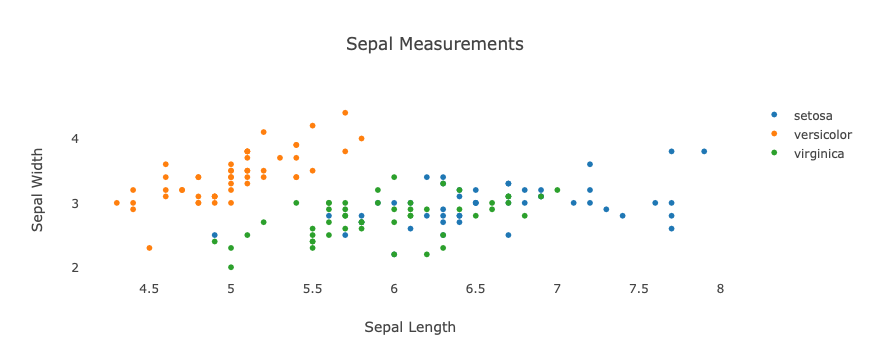

In [12]:
let mut plot = Plot::new();
for i in 0..sepal_arr.len_of(Axis(0)) {
    let length = sepal_arr.slice(s![i, 0, ..]).to_owned();
    let width = sepal_arr.slice(s![i, 1, ..]).to_owned();

    let trace = Scatter::new(length, width)
        .mode(Mode::Markers)
        .name(&species[i]);
    plot.add_trace(trace);
    
    let layout = Layout::new()
        .title(Title::new("Sepal Measurements"))
        .x_axis(
            Axis::new()
                .title(Title::new("Sepal Length"))
                .show_grid(false)
        )
        .y_axis(
            Axis::new()
                .title(Title::new("Sepal Width"))
                .show_grid(false)
        );
    plot.set_layout(layout);
}

plot

## Petal Measurements

In [13]:
let petal_df = grouped_lazy.clone().select([
    col("petal_length"),
    col("petal_width"),
]).collect()?;
petal_df

shape: (3, 2)
┌─────────────────────┬─────────────────────┐
│ petal_length        ┆ petal_width         │
│ ---                 ┆ ---                 │
│ list[f64]           ┆ list[f64]           │
╞═════════════════════╪═════════════════════╡
│ [1.4, 1.4, ... 1.4] ┆ [0.2, 0.2, ... 0.2] │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ [6.0, 5.1, ... 5.1] ┆ [2.5, 1.9, ... 1.8] │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ [4.7, 4.5, ... 4.1] ┆ [1.4, 1.5, ... 1.3] │
└─────────────────────┴─────────────────────┘

In [14]:
// shape: [species, measurement, num_elements]
let mut petal_arr: Array3<f64> = Array3::default((3, 2, 50));

for (col_idx, col) in petal_df.clone().iter().enumerate() {
    let p: Array2<f64> = col.list()?.to_ndarray::<Float64Type>()?;
    for i in 0..3 {
        petal_arr.slice_mut(s![i, col_idx, ..]).assign(&p.slice(s![i, ..]));
    }
}

petal_arr

[[[1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1.0, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4],
  [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2, 0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2]],

 [[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1],
  [2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2.0, 1.9, 2.1, 2.0, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2.0, 2.0, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 1.9, 2.0, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9

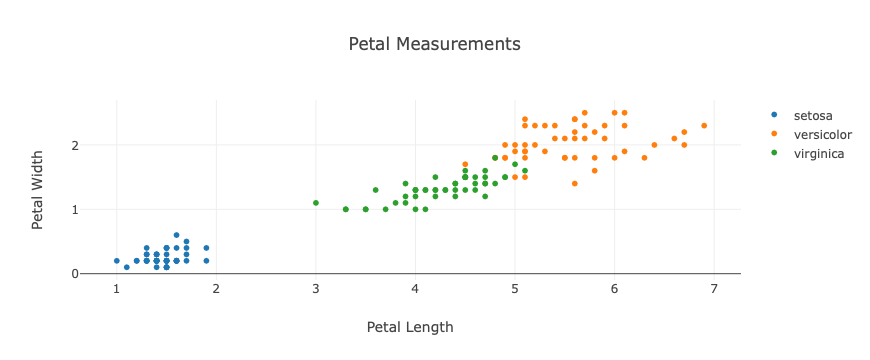

In [15]:
let mut plot = Plot::new();
for i in 0..petal_arr.len_of(Axis(0)) {
    let length = petal_arr.slice(s![i, 0, ..]).to_owned();
    let width = petal_arr.slice(s![i, 1, ..]).to_owned();

    let trace = Scatter::new(length, width)
        .mode(Mode::Markers)
        .name(&species[i]);
    plot.add_trace(trace);
    
    let layout = Layout::new()
        .title(Title::new("Petal Measurements"))
        .x_axis(Axis::new().title(Title::new("Petal Length")))
        .y_axis(Axis::new().title(Title::new("Petal Width")));
    plot.set_layout(layout);
}

plot